# **POSTTEST 6**

**Library yang di gunakan**

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [101]:
df = pd.read_csv('bank-additional-full.csv', delimiter= ";", low_memory=False)

**Menampilkan Dataset**

In [102]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


---

### **Preprocessing dataset**

**Encoding target**

In [103]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])


In [104]:
# Pilih atribut yang dianggap memengaruhi hasil prediksi
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X = df[selected_features]
y = df['y']


**One-hot encoding untuk atribut kategori**

In [105]:
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)


**Normalisasi atribut numerik**

In [106]:
scaler = StandardScaler()
X[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(X[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']])



**Split dataset menjadi train dan test**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Membuat model sequential**

In [108]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                3392      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5505 (21.50 KB)
Trainable params: 5505 (21.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Callback**

Callback untuk menghentikan pelatihan jika tidak ada perbaikan pada validation loss


In [110]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


Callback untuk menyimpan model terbaik berdasarkan validation loss


In [111]:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)


**Pelatihan model**


In [112]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


412/412 [==============================] - 2s 4ms/step - loss: 0.2906 - accuracy: 0.8982 - val_loss: 0.2801 - val_accuracy: 0.9008
Epoch 2/100
 62/412 [===>..........................] - ETA: 0s - loss: 0.2783 - accuracy: 0.8997

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


412/412 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.9016 - val_loss: 0.2786 - val_accuracy: 0.9023
Epoch 3/100
412/412 [==============================] - 1s 3ms/step - loss: 0.2709 - accuracy: 0.9023 - val_loss: 0.2780 - val_accuracy: 0.9008
Epoch 4/100
412/412 [==============================] - 1s 3ms/step - loss: 0.2686 - accuracy: 0.9039 - val_loss: 0.2763 - val_accuracy: 0.9020
Epoch 5/100
412/412 [==============================] - 2s 4ms/step - loss: 0.2671 - accuracy: 0.9033 - val_loss: 0.2805 - val_accuracy: 0.8982
Epoch 6/100
412/412 [==============================] - 1s 3ms/step - loss: 0.2651 - accuracy: 0.9037 - val_loss: 0.2779 - val_accuracy: 0.8988
Epoch 7/100
412/412 [==============================] - 1s 3ms/step - loss: 0.2641 - accuracy: 0.9042 - val_loss: 0.2797 - val_accuracy: 0.8994
Epoch 8/100
412/412 [==============================] - 1s 3ms/step - loss: 0.2627 - accuracy: 0.9052 - val_loss: 0.2782 - val_accuracy: 0.8997
Epoch 9/100

In [114]:
# Load model terbaik
model = keras.models.load_model('best_model.h5')

**Evaluasi Model**

In [115]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

258/258 [==============================] - 1s 2ms/step - loss: 0.2838 - accuracy: 0.8971
Test Loss: 0.2838
Test Accuracy: 0.8971


**Berikut adalah grafik perbandingan accuracy dan loss dari train dan test**

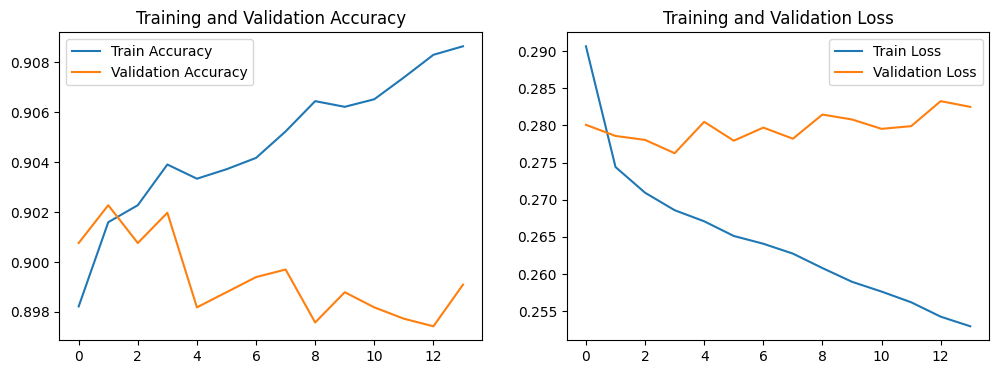

In [116]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()